In [1]:
import os, sys
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir,'..')))

In [8]:
from scripts.data_load import load_data
from scripts.data_visualization import *
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [3]:
tellco_data = load_data("../data/Data/Copy of Week2_challenge_data_source(CSV).csv")

In [6]:
metrics_per_user = tellco_data.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count', 
    'Dur. (ms)': 'sum',  
    'Total DL (Bytes)': 'sum',  
    'Total UL (Bytes)': 'sum'  
}).reset_index()

metrics_per_user['Total Traffic (Bytes)'] = metrics_per_user['Total DL (Bytes)'] + metrics_per_user['Total UL (Bytes)']

metrics_per_user.rename(columns={'Bearer Id': 'Session Frequency'}, inplace=True)

top_10_frequency = metrics_per_user.nlargest(10, 'Session Frequency')
top_10_duration = metrics_per_user.nlargest(10, 'Dur. (ms)')
top_10_traffic = metrics_per_user.nlargest(10, 'Total Traffic (Bytes)')

top_10_frequency, top_10_duration, top_10_traffic

(       MSISDN/Number  Session Frequency   Dur. (ms)  Total DL (Bytes)  \
 13526   3.362632e+10                 18   8791927.0      7.301517e+09   
 6437    3.361489e+10                 17   9966898.0      8.156743e+09   
 13180   3.362578e+10                 17  18553754.0      7.770043e+09   
 37052   3.365973e+10                 16   4035428.0      7.081602e+09   
 76363   3.367588e+10                 15   4865947.0      7.309542e+09   
 92923   3.376054e+10                 15   9279434.0      7.811295e+09   
 65118   3.366716e+10                 13   8744914.0      5.052068e+09   
 666     3.360313e+10                 12   6287761.0      4.540607e+09   
 1279    3.360452e+10                 12   5207990.0      5.096079e+09   
 13994   3.362708e+10                 12   4703516.0      5.309479e+09   
 
        Total UL (Bytes)  Total Traffic (Bytes)  
 13526       669650721.0           7.971167e+09  
 6437        689483001.0           8.846226e+09  
 13180       729577380.0          

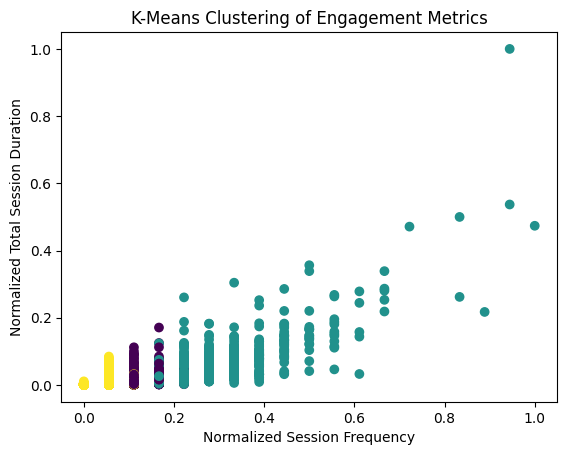

Session Frequency                      Dur. (ms)              \
                      min max      mean    sum       min         max   
Cluster                                                                
0                       1   4  2.184791  46228   18235.0   3174824.0   
1                       3  18  4.258194  17020   49323.0  18553754.0   
2                       0   2  1.043550  85258    7142.0   1573420.0   

                                     Total Traffic (Bytes)                \
                  mean           sum                   min           max   
Cluster                                                                    
0        215100.806229  4.551318e+09          2.842182e+08  1.915933e+09   
1        572159.112084  2.286920e+09          1.085994e+09  8.846226e+09   
2        107473.680857  8.780600e+09          3.324901e+07  1.427100e+09   

                                     
                 mean           sum  
Cluster                              
0        1.138979e+09  2.409966e+13  
1        2.294204e+09  9.169934e+12  
2        4.964976e+08  4.056385e+13

In [9]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(metrics_per_user[['Session Frequency', 'Dur. (ms)', 'Total Traffic (Bytes)']])

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
metrics_per_user['Cluster'] = kmeans.fit_predict(normalized_data)

# Compute cluster statistics
cluster_stats = metrics_per_user.groupby('Cluster').agg({
    'Session Frequency': ['min', 'max', 'mean', 'sum'],
    'Dur. (ms)': ['min', 'max', 'mean', 'sum'],
    'Total Traffic (Bytes)': ['min', 'max', 'mean', 'sum']
})

# Plot clusters
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=metrics_per_user['Cluster'], cmap='viridis')
plt.title("K-Means Clustering of Engagement Metrics")
plt.xlabel("Normalized Session Frequency")
plt.ylabel("Normalized Total Session Duration")
plt.show()

cluster_stats

In [14]:
# List of application columns
applications = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 
                'Google DL (Bytes)', 'Google UL (Bytes)', 
                'Email DL (Bytes)', 'Email UL (Bytes)', 
                'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
                'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 
                'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 
                'Other DL (Bytes)', 'Other UL (Bytes)']

# Calculate total traffic per application
for app in applications:
    tellco_data[app + ' Total'] = tellco_data[app.replace('DL', 'DL')].fillna(0) + tellco_data[app.replace('UL', 'UL')].fillna(0)

# Aggregate traffic by MSISDN
traffic_per_user = tellco_data.groupby('MSISDN/Number').sum()

# Top 10 most engaged users per application
top_users_per_app = {}
for app in applications:
    top_users_per_app[app] = traffic_per_user.nlargest(10, app + ' Total')

top_users_per_app


{'Social Media DL (Bytes)':                   Bearer Id  \
 MSISDN/Number                 
 3.362632e+10   1.315773e+20   
 3.376054e+10   1.963570e+20   
 3.365973e+10   2.088229e+20   
 3.361489e+10   1.241554e+20   
 3.362578e+10   2.217933e+20   
 3.366716e+10   1.695515e+20   
 3.378632e+10   8.798243e+19   
 3.366907e+10   1.434667e+20   
 3.360313e+10   8.747802e+19   
 3.365849e+10   1.176701e+20   
 
                                                            Start  Start ms  \
 MSISDN/Number                                                                
 3.362632e+10   4/15/2019 20:474/16/2019 5:274/17/2019 16:394/...   10270.0   
 3.376054e+10   4/11/2019 1:074/11/2019 10:064/12/2019 4:274/1...    9183.0   
 3.365973e+10   4/24/2019 18:164/25/2019 5:594/23/2019 18:164/...    7862.0   
 3.361489e+10   4/14/2019 3:344/14/2019 15:304/15/2019 3:374/1...    7726.0   
 3.362578e+10   4/9/2019 9:474/9/2019 9:474/10/2019 9:474/11/2...    9157.0   
 3.366716e+10   4/16/2019 17:474/1

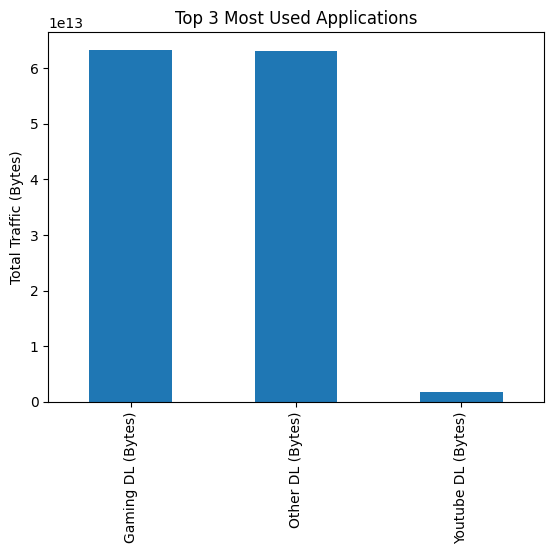

In [15]:
# Aggregate total traffic per application
application_traffic = tellco_data[applications].sum()

# Identify top 3 applications
top_3_apps = application_traffic.nlargest(3)

# Plot
top_3_apps.plot(kind='bar', title="Top 3 Most Used Applications")
plt.ylabel("Total Traffic (Bytes)")
plt.show()


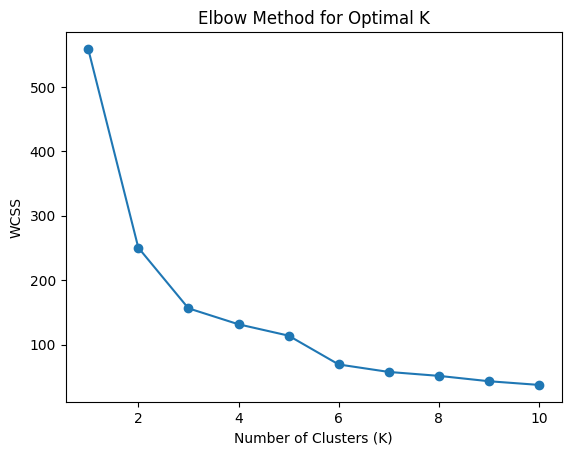

In [16]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(normalized_data)
    wcss.append(kmeans.inertia_)

# Plot WCSS
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()
